### Imports

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from fitter import Fitter

import warnings
warnings.filterwarnings("ignore")

### Data ingest and prep

In [3]:
df = pd.read_csv('./data_in/chart_wind1_2020to2023sept25.csv')

In [4]:
df.columns = ['Date', 'Speed', 'Gust', 'Direction']

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df = df.reset_index(drop=True)

print(df.shape)
display(df.head(4))
display(df.tail(4))

(31864, 4)


,Date,Speed,Gust,Direction
0,2019-12-31 16:53:00,6,NaN,100
1,2019-12-31 17:53:00,3,NaN,60
2,2019-12-31 18:53:00,0,NaN,0
3,2019-12-31 19:53:00,0,NaN,0


,Date,Speed,Gust,Direction
31860,2023-09-25 13:53:00,15,18.0,240
31861,2023-09-25 14:53:00,10,NaN,250
31862,2023-09-25 15:53:00,14,NaN,240
31863,2023-09-25 16:53:00,18,NaN,240


### Data exploration

In [6]:
print(np.min(df['Speed']))
print(np.max(df['Speed']))
print(np.mean(df['Speed']))
print(np.std(df['Speed']))

0
48
10.057054983680644
7.28670738453888


### Visualization

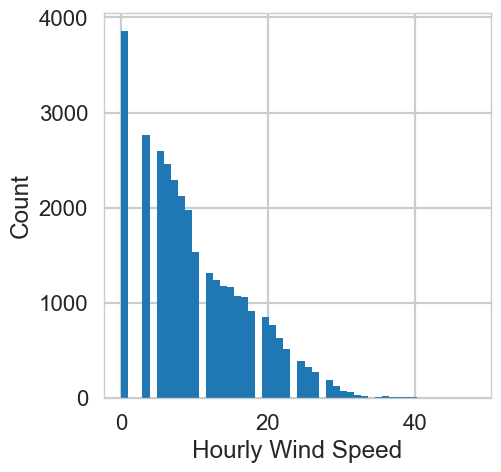

In [18]:
plt.figure(figsize=(7,6))

plt.style.use('default')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

plt.hist(df['Speed'], bins=50);

plt.xlabel('Hourly Wind Speed')
plt.ylabel('Count');

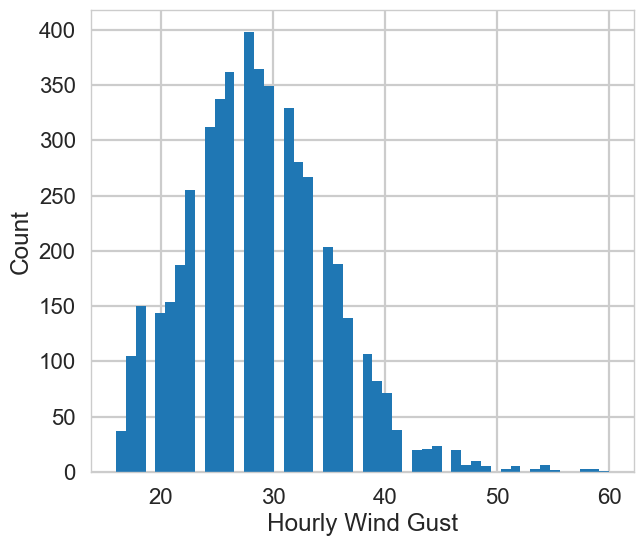

In [19]:
plt.figure(figsize=(7,6))

plt.style.use('default')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

plt.hist(df['Gust'], bins=50);

plt.xlabel('Hourly Wind Gust')
plt.ylabel('Count');

### Fitting probability distributions, automatic model selection

In [9]:
f = Fitter(df['Speed'].values)

In [10]:
f.fit()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED f distribution (taking more than 30 seconds)
SKIPPED fatiguelife distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED genhalflogistic distribution (taking more than 30 seconds)
SKIPPED genhyperbolic distribution (taking more than 30 seconds)
SKIPPED geninvgauss distribution (taking more than 30 seconds)
SKIPPED genlogistic distribution (taking more than 30 seconds)
SKIPPED genpareto distribution (taking more than 30 seconds)
SKIPPED gibrat distribution (taking more than 30 seconds)
SKIPPED gompertz distribution (tak

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,0.173213,1105.327055,1130.434751,inf,0.137614,0.000000e+00
foldnorm,0.176713,1123.327960,1148.435656,inf,0.120983,0.000000e+00
halfnorm,0.177033,1050.919749,1067.658214,inf,0.120983,0.000000e+00
kstwobign,0.181558,1076.220622,1092.959086,inf,0.080060,4.260186e-178
alpha,0.181719,1005.818236,1030.925932,inf,0.076496,1.308178e-162


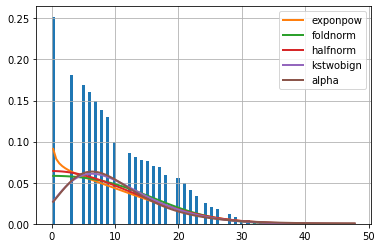

In [11]:
f.summary()